In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("C:\Data-Project-1\Data-Project-1\Thyroid_Diff.csv")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\User\AppData\Local\Temp\ipykernel_14772\2061595006.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("C:\Data-Project-1\Data-Project-1\Thyroid_Diff.csv")


In [10]:
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [23]:
df = df.rename(columns = {'Hx Smoking':'Smoke_hist',
                     'Hx Radiothreapy':'Radiotherapy_hist',
                     'Thyroid Function':'Status',
                     'Pathology':'Type',
                     'T':'Tumor_class',
                     'N':'Nodal_class',
                     'M':'Metastatis_class'})

- Age: The age of the patient at the time of diagnosis or treatment.
- Gender: The gender of the patient (male or female).
- Smoking: Whether the patient is a smoker or not.
- Hx Smoking: Smoking history of the patient (e.g., whether they have ever smoked).
- Hx Radiotherapy: History of radiotherapy treatment for any condition.
- Thyroid Function: The status of thyroid function, possibly indicating if there are any abnormalities.
- Physical Examination: Findings from a physical examination of the patient, which may include palpation of the thyroid gland and surrounding structures.
- Adenopathy: Presence or absence of enlarged lymph nodes (adenopathy) in the neck region.
- Pathology: Specific types of thyroid cancer as determined by pathology examination of biopsy samples.
- Focality: Whether the cancer is unifocal (limited to one location) or multifocal (present in multiple locations).
- Risk: The risk category of the cancer based on various factors, such as tumor size, extent of spread, and histological type.
- T: Tumor classification based on its size and extent of invasion into nearby structures.
- N: Nodal classification indicating the involvement of lymph nodes.
- M: Metastasis classification indicating the presence or absence of distant metastases.
- Stage: The overall stage of the cancer, typically determined by combining T, N, and M classifications.
- Response: Response to treatment, indicating whether the cancer responded positively, negatively, or remained stable after treatment.
- Recurred: Indicates whether the cancer has recurred after initial treatment

Note there is no missing values so no changes have to be made here. 

In [19]:
unique_val = [df[n].unique() for n in df.columns]
columns = df.columns
for i in range(len(unique_val)):
    print(f'Unique values for {columns[i]}: {unique_val[i]}')

Unique values for Age: [27 34 30 62 52 41 46 51 40 75 59 49 50 76 42 44 43 36 70 60 33 26 37 55
 31 45 20 38 29 25 21 23 24 35 54 22 69 28 17 73 18 39 57 66 32 47 56 63
 19 67 72 61 68 48 81 53 58 80 79 65 15 82 71 64 78]
Unique values for Gender: ['F' 'M']
Unique values for Smoking: ['No' 'Yes']
Unique values for Hx Smoking: ['No' 'Yes']
Unique values for Hx Radiothreapy: ['No' 'Yes']
Unique values for Thyroid Function: ['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']
Unique values for Physical Examination: ['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']
Unique values for Adenopathy: ['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']
Unique values for Pathology: ['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell']
Unique values for Focality: ['Uni-Focal' 'Multi-Focal']
Unique values for Risk: ['Low' 'Intermediate' 'High']
Unique value

From this:
- Age: scale it.
- Gender-Focalty: one hot.
- Risk and Response and stage(mabye) - origanal encode
- Rest is one hot


Gender  Recurred
F       No          0.788462
        Yes         0.211538
M       Yes         0.591549
        No          0.408451
Name: count, dtype: float64


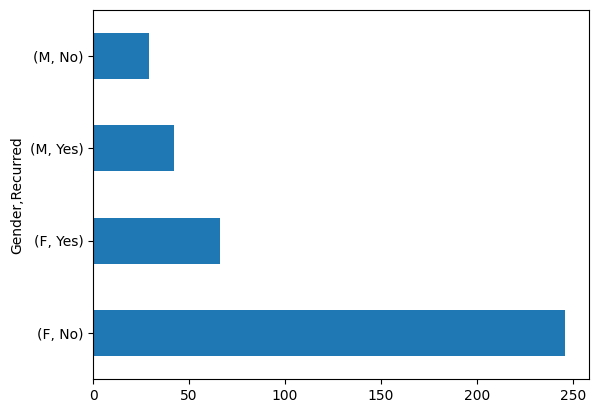

In [45]:
#plot = df["Gender"].value_counts().plot(kind='bar', ylabel = column)
# Need to get percentage that Reccured wrt gender and also gender distribution to check if percentages match
df[['Gender', 'Recurred']].value_counts().plot(kind='barh')

print(df[['Gender', 'Recurred']].value_counts()/df['Gender'].value_counts())

In [50]:
df[['Gender', 'Recurred']].value_counts()

Gender  Recurred
F       No          246
        Yes          66
M       Yes          42
        No           29
Name: count, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_14772\2411235648.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'M':[recurr_per_gender[0], recurr_per_gender[1]],
C:\Users\User\AppData\Local\Temp\ipykernel_14772\2411235648.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'F':[recurr_per_gender[2], recurr_per_gender[0]]


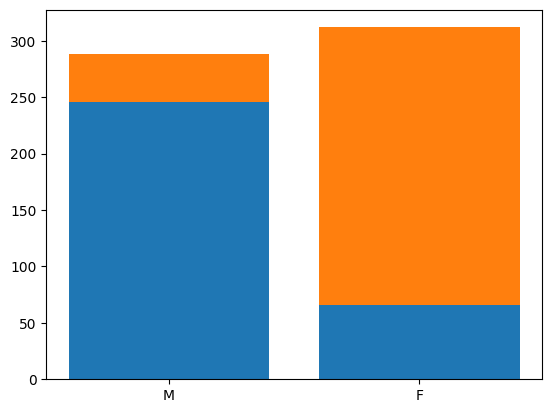

In [58]:
recurr_per_gender = df[['Gender', 'Recurred']].value_counts()
gender_recur_plot = {
    'M':[recurr_per_gender[0], recurr_per_gender[1]],
    'F':[recurr_per_gender[2], recurr_per_gender[0]]
}
bottom = np.zeros(2)
for gender, val in gender_recur_plot.items():
    plot = plt.bar(['M', 'F'], val, bottom = bottom)
    bottom += val

Gender
F    0.814621
M    0.185379
Name: count, dtype: float64


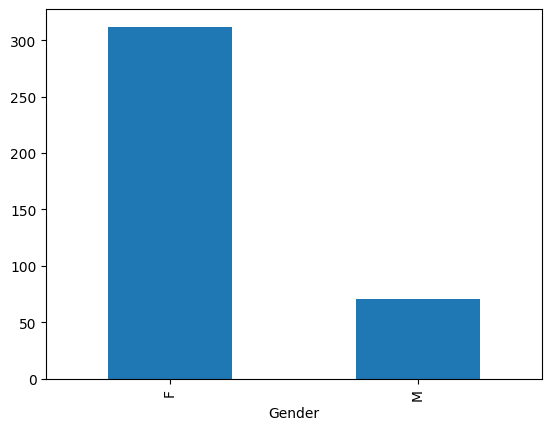

In [42]:
df['Gender'].value_counts().plot(kind = 'bar')
print(df['Gender'].value_counts()/df.shape[0])

In [40]:
df.shape

(383, 17)

<Axes: title={'center': 'Stacked Bar Graph'}, ylabel='Recurred'>

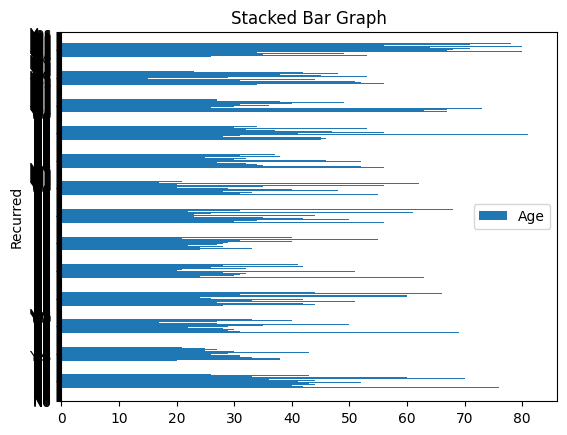